In [14]:
import numpy as np
import scipy.io
D = scipy.io.loadmat('E:\\淺度機器學習\\data\\allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image
y = np.ndarray.flatten(D['nfaces']) #每位人臉的張數
#每張影像的大小與人數
m = int(D['m']) # 168
n = int(D['n']) # 192
n_persons = int(D['person']) # 38

In [15]:
import matplotlib.pyplot as plt
def show_montage(X, n, m, h, w):
    '''
    X: 影 像 資 料 矩 陣 , 每 行 代 表 一 張 影 像
    n, m: 每 張 影 像 的 大 小 n x m
    h, w : 建 立 一 個 蒙 太 奇 圖 陣 , 大小 figsize = (w,h)
    '''
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

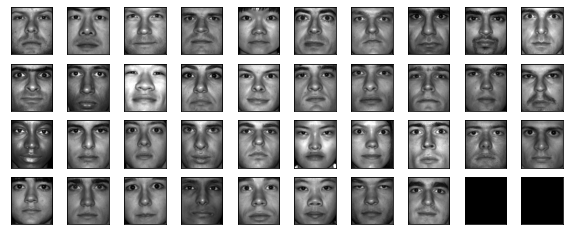

In [18]:
all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
for i in range(n_persons):
    all_diff_persons[:,i] = X[:,cnt]
    cnt = cnt + y[i]
show_montage(all_diff_persons, n, m, 4,10)


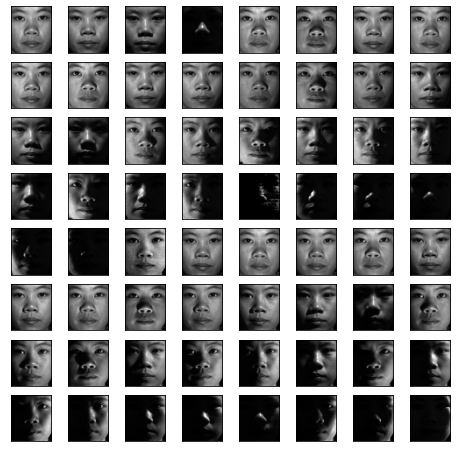

In [20]:
which_person = 35 #0~37
start_col = y[0:which_person].sum()
end_col = start_col + y[which_person]
show_montage(X[:,start_col:end_col],n,m,8,8)

In [22]:
from numpy.linalg import svd

avgFace = X.mean(axis=1).reshape(-1,1)
X_avg = X-np.tile(avgFace,(1,X.shape[1]))
U,E,VT = svd (X_avg,full_matrices = False)

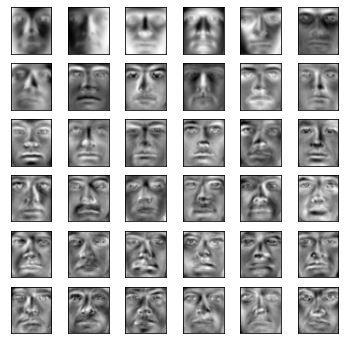

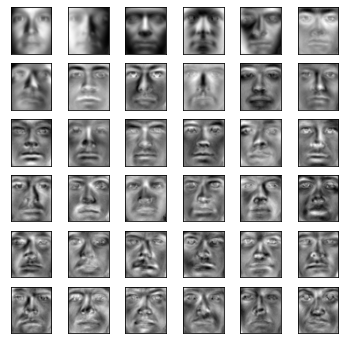

In [23]:
show_montage(U,n,m,6,6)
show_montage (255-U,n,m,6,6)

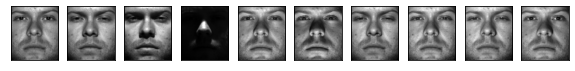

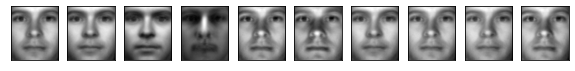

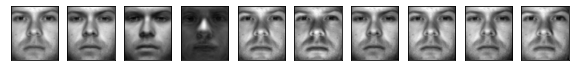

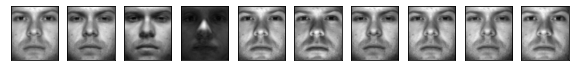

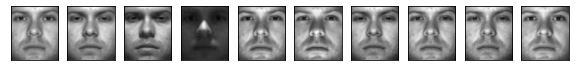

[112.1  22.4  11.2   5.6]


In [24]:
h, w = 1, 10
show_montage(X, n ,m, h, w)
q = np.array([20, 100, 200, 400])
for i in q:
    Uq = U[:, :i]
    Xq = Uq @ (Uq.T @ X[:, :h*w])
    Xq = Xq + np.tile(avgFace, (1, Xq.shape[1]))
    show_montage(Xq, n, m, h, w)

compress_ratio = (X.shape[0] * X.shape[1])/(X.shape[0] * q + q * X.shape[1])
print(np.round(compress_ratio, 1))